# Final exam - solution

Importing libraries

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp 
import math

## Question 1 : Simplex method application

### item **a**

In [ ]:
def tableau(xB, xN, c0t, ct, bt, Nt):
  T = Nt[:,:]
  T =T.row_insert(0, ct.transpose())
  T =T.row_insert(0, xN.transpose())
  bt = bt.row_insert(0, c0t)
  bt = bt.row_insert(0, sp.Matrix(['1']))
  xB = xB.row_insert(0, sp.Matrix(['z']))
  xB = xB.row_insert(0, sp.Matrix(['Simplex']))
  T = T.col_insert(0, bt)
  T = T.col_insert(0, xB)
  return T

def selectBasicVarPos(bt, Ns):
  q_min = sp.oo #Establecemos un cocienta inicial muy grande
  for i, elem in enumerate(bt):
    if Ns[i] < 0 and -elem / Ns[i] < q_min:
      q_min = -elem /  Ns[i]
      r = i
  return r

def selectNoBasicVarPos(ct):
  c_min = min(ct) #Busca el minimo de c_tilda
  for i, elem in enumerate(ct): #Busca la posicion de c_min
    if elem == c_min: #Encontrado
      s = i #Guarda la posicion
      break
  return s

def selectMinBasicValPos(bt):
  return selectNoBasicVarPos(bt)

def addNoBasicVariable(xN, ct, Nt, lenxN, lenxB, lenbt, K):
  xN = xN.row_insert(lenxN, sp.Matrix([sp.symbols('x' + str(lenxN+lenxB+1))]))
  ct = ct.row_insert(lenxN, sp.Matrix([K])) #
  Nt = Nt.col_insert(lenxN, sp.ones(lenbt, 1))
  return xN, ct, Nt

def updateNoBasicVarPos(posx1, posx2, r, s):
  if posx1[0] == r and posx1[1] == 'b':
    posx1[0] = s
    posx1[1] = 'n'
  elif posx1[0] == s and posx1[1] == 'n':
    posx1[0] = r
    posx1[1] = 'b'
  if posx2[0] == r and posx2[1] == 'b':
    posx2[0] = s
    posx2[1] = 'n'
  elif posx2[0] == s and posx2[1] == 'n':
    posx2[0] = r
    posx2[1] = 'b'
  return posx1, posx2

def pivot(xB, xN, c0t, ct, bt, Nt, r, s):
  br = bt[r]
  cs = ct[s]
  Nrs = Nt[r, s]
  Nr = Nt[r, :]
  Ns = Nt[:, s]
  xN[s], xB[r] = xB[r], xN[s]
  c0t = c0t - sp.Matrix([br*cs/Nrs])
  ct = ct - Nr.transpose() * cs / Nrs
  bt = bt - Ns * br / Nrs
  bt[r] = -br/Nrs
  ct[s] = cs/Nrs 
  for i in range(len(bt)):
      for j in range(len(ct)):
          if i != r and j != s:
              Nt[i, j] = Nt[i, j] - Ns[i]*Nr[j]/Nrs
  Nt[r, :] = -Nr/Nrs
  Nt[:, s] = Ns/Nrs
  Nt[r, s] = 1/Nrs
  return xB, xN, c0t, ct, bt, Nt, r, s

def simplex(xB, xN, c0t, ct, bt, Nt, K=1000000):
  print("=============Tabla inicial============= ")
  sp.pprint(tableau(xB, xN, c0t, ct, bt, Nt))
  print()
  #posx1 = sp.Matrix([0,'n']) ##Posicion y tipo de la variable x1
  #posx2 = sp.Matrix([1,'n']) ##Posicion y tipo de la variable x1
  if min(bt) < 0: #Buscar solución inicial factible
    print("El minimo elemento de b_tilda es", min(bt), " .Como es menor que cero agregamos una nueva variable no básica")
    print("K =", K)
    
    res = addNoBasicVariable(xN, ct, Nt, len(xN), len(xB), len(bt), K) #Adicionamos la nueva variable NB en la tabla
    xN, ct, Nt = res[0], res[1], res[2]
    s = len(xN)-1 #Posición de la nueva variable no básica
    r = selectMinBasicValPos(bt) #Seleccionamos la variable básica a intercambiar

    print("Se agregó", xN[s], " como variable no básica")
    sp.pprint(tableau(xB, xN, c0t, ct, bt, Nt))
    print()
    print("Variable básica a intercambiar:", str(xB[r]))
    print("Intercambiamos la variable básica", xB[r], "y la variable no básica", xN[s])
    print()
    
    res = pivot(xB, xN, c0t, ct, bt, Nt, r, s) ########## pivotear
    xB, xN, c0t, ct, bt, Nt = res[0], res[1], res[2], res[3], res[4], res[5]

    sp.pprint(tableau(xB, xN, c0t, ct, bt, Nt))
    print()


  iter = 0
  print("Empieza proceso iterativo:")
  while min(ct) < 0 and iter < 1000: #Paso iterativo
    iter += 1
    print("Iteracion: ", iter)

    s = selectNoBasicVarPos(ct) #Seleccionamos la variable no básica a intercambiar
    r = selectBasicVarPos(bt, Nt[:, s]) #Seleccionamos la variable básica a intercambiar

    print("Variable no básica a intercambiar:", str(xN[s]))
    print("Variable básica a intercambiar:", str(xB[r]))
    print("Intercambiamos la variable básica", str(xB[r]), "y la variable no básica", xN[s])
    print()

    res = pivot(xB[:, :], xN[:, :], c0t, ct, bt, Nt[:, :], r, s) ########## pivotear
    xB, xN, c0t, ct, bt, Nt = res[0], res[1], res[2], res[3], res[4], res[5]

    sp.pprint(tableau(xB, xN, c0t, ct, bt, Nt))
    print() 

Fisrt, after we have our problem in its standard form, we calculate the first tablaux.

In [ ]:
b = sp.Matrix([30000,50000,50000,75000,0,30000])
cB = sp.Matrix([2.75,0,0,0,0,0])
cN = sp.Matrix([2.45,2.5])

B = sp.Matrix([[0,1, 0, 0, 0,0], [0,0,1,0,0,0],[1,0,0,1,0,0],[0.995,0,0,0,0,0],[0,0,0,0,-1,0],[1,0,0,0,0,-1]])
N = sp.Matrix([[1,0], [0, 1],[0,0],[0.9,0.99],[1,-0.1],[0,0]])

bt = B.inv()*b
Nt = -B.inv()*N

c0t = cB.transpose()*bt
ct = (cB.transpose()*Nt + cN.transpose()).transpose()

x = sp.Matrix([sp.symbols('x' + str(i+1)) for i in range(len(cB) + len(cN))])

xB = sp.Matrix([x[2], x[3],x[4],x[5],x[6],x[7]])
xN = sp.Matrix([x[0], x[1]])

print("c0_tilda: ")
sp.pprint(c0t)
print()
print("c_tilda: ")
sp.pprint(ct)
print()
print("b_tilda: ")
sp.pprint(bt)
print()
print("N_tilda: ")
sp.pprint(Nt)
print()
print("Variables básicas: ")
sp.pprint(xB)
print()
print("Variables no básicas: ")
sp.pprint(xN)
print()

c0_tilda: 
[207286.432160804]

c_tilda: 
⎡-0.0374371859296478⎤
⎢                   ⎥
⎣-0.236180904522613 ⎦

b_tilda: 
⎡75376.8844221105 ⎤
⎢                 ⎥
⎢      30000      ⎥
⎢                 ⎥
⎢      50000      ⎥
⎢                 ⎥
⎢-25376.8844221105⎥
⎢                 ⎥
⎢        0        ⎥
⎢                 ⎥
⎣45376.8844221105 ⎦

N_tilda: 
⎡-0.904522613065327  -0.994974874371859⎤
⎢                                      ⎥
⎢        -1                  0         ⎥
⎢                                      ⎥
⎢        0                   -1        ⎥
⎢                                      ⎥
⎢0.904522613065327   0.994974874371859 ⎥
⎢                                      ⎥
⎢        1                  -0.1       ⎥
⎢                                      ⎥
⎣-0.904522613065327  -0.994974874371859⎦

Variables básicas: 
⎡x₃⎤
⎢  ⎥
⎢x₄⎥
⎢  ⎥
⎢x₅⎥
⎢  ⎥
⎢x₆⎥
⎢  ⎥
⎢x₇⎥
⎢  ⎥
⎣x₈⎦

Variables no básicas: 
⎡x₁⎤
⎢  ⎥
⎣x₂⎦



Then, we take $x_1$ and $x_2$ as non basic variables and conduct the simplex method.

In [ ]:
simplex(xB, xN, c0t, ct, bt, Nt, K=2)

=============Tabla inicial============= 
⎡Simplex          1                  x₁                   x₂        ⎤
⎢                                                                   ⎥
⎢   z     207286.432160804   -0.0374371859296478  -0.236180904522613⎥
⎢                                                                   ⎥
⎢  x₃     75376.8844221105   -0.904522613065327   -0.994974874371859⎥
⎢                                                                   ⎥
⎢  x₄           30000                -1                   0         ⎥
⎢                                                                   ⎥
⎢  x₅           50000                 0                   -1        ⎥
⎢                                                                   ⎥
⎢  x₆     -25376.8844221105   0.904522613065327   0.994974874371859 ⎥
⎢                                                                   ⎥
⎢  x₇             0                   1                  -0.1       ⎥
⎢                                                

In [ ]:
print("Thus, we conclude that number of copies assigned to ")
print("Benson: 4,181")
print("Lakeside: 30,000")
print("Johnson: 41,806")
print("Minimum cost: 197,256.24")

Thus, we conclude that number of copies assigned to 
Benson: 4,181
Lakeside: 30,000
Johnson: 41,806
Minimum cost: 197,256.24


### item **b**

Since the Benson cost is lower, it would be assigned a higher quantity of copies to this firm.

### item **c**

As the shadow price of Lakeside is $0.221$ USD, a reduction of this restriction, would imply a decrease of our cost of each copy of this firm.

## Question 2 : Convexity

### item **a**

As $C$ is the cartesian product of two intervals and every interval is convex so $C$ is.

### item **b**

First, to get insight, let us plot the graph of $f$:

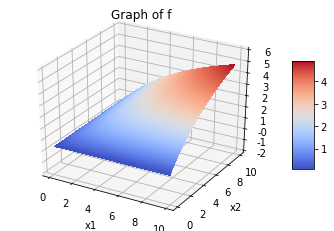

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(0.1, 10, 0.1)
Y = np.arange(0.1, 10, 0.1)
X, Y = np.meshgrid(X, Y)

Z = (X*Y)/(X+Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-2, 6)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Graph of f')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Then, setting $a:=(2,0)$, $b:=(0,2)$ ant $t:=0.5$. Finally, as $a$ and $b$ are in $C$ and $0.5=f(t\cdot a+(1-t)\cdot b)$ is greathet than $$0=t\cdot f(a)+(1-t)\cdot f(b),$$ we conclude that $f$ is not convex. 

## Question 3 : Finding global minima of Himmelblau function


### item **a**

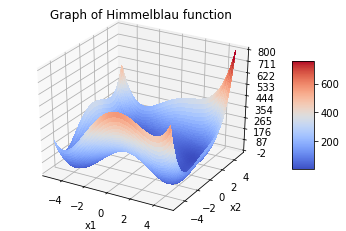

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

Z = (X**2 + Y  -11)**2 + (X + Y**2 - 7)**2
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.set_zlim(-2, 800)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.f'))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Graph of Himmelblau function')

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

### item **b**

From the figure above it can be seen that the segment line between two of the global minima is not entirely in the epigraph of the function.

### item **c**

In [ ]:
sp.init_printing(use_unicode=True)
x1, x2 = sp.symbols('x1 x2', real=True)

def evaluate(func, x):
    return func.evalf(subs={x1: x[0], x2: x[1]})
# Objective function
f = (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

def solve(f, x):
    tolerance = 1e-13
    sigma = 0.1
    beta = 0.1
    s = 1
	
    gradient = sp.Matrix([f]).jacobian((x1,x2)).T
    k = 0
    fx = evaluate(f,x)
    grad = evaluate(gradient,x)
    
    while (grad.norm() > tolerance):
        
        # direction searching
        d = -grad

        # line searching - Armijo rule
        rhs = -(sigma*s*d.T*grad)[0] # right hand side
        alpha = s
        while fx - evaluate(f, x + alpha*d) < rhs:
            alpha *= beta
            rhs *= beta

        print(f'Iteration {k}')
        print(f'x\t\t:\t{x}')
        print(f'f(x)\t\t:\t{fx}')
        print(f'direction\t:\t{d}')
        print(f'alpha\t\t:\t{alpha}\n\n')

        # Updating
        x = x + alpha*d
        k += 1
        fx = evaluate(f,x)
        grad = evaluate(gradient,x)

    print(f'x\t\t:\t{x}')
    print(f'f(x)\t\t:\t{fx}')

### item **d**

In [ ]:
x = sp.Matrix([[-4],[-4]])
solve(f,x)

Iteration 0
x		:	Matrix([[-4], [-4]])
f(x)		:	26.0000000000000
direction	:	Matrix([[6.00000000000000], [78.0000000000000]])
alpha		:	0.010000000000000002


Iteration 1
x		:	Matrix([[-3.94000000000000], [-3.22000000000000]])
f(x)		:	2.02609952000000
direction	:	Matrix([[21.6879360000000], [-9.96940800000002]])
alpha		:	0.010000000000000002


Iteration 2
x		:	Matrix([[-3.72312064000000], [-3.31969408000000]])
f(x)		:	0.298181634524399
direction	:	Matrix([[-7.41624782212868], [4.86322518617416]])
alpha		:	0.010000000000000002


Iteration 3
x		:	Matrix([[-3.79728311822129], [-3.27106182813826]])
f(x)		:	0.0314861675479566
direction	:	Matrix([[2.44738187224110], [-1.57149261378182]])
alpha		:	0.010000000000000002


Iteration 4
x		:	Matrix([[-3.77280929949888], [-3.28677675427608]])
f(x)		:	0.00368142944734628
direction	:	Matrix([[-0.855292415148736], [0.500997980057636]])
alpha		:	0.010000000000000002


Iteration 5
x		:	Matrix([[-3.78136222365036], [-3.28176677447550]])
f(x)		:	0.0004159987

In [ ]:
x = sp.Matrix([[-4],[4]])
solve(f,x)

Iteration 0
x		:	Matrix([[-4], [4]])
f(x)		:	106.000000000000
direction	:	Matrix([[134.000000000000], [-98.0000000000000]])
alpha		:	0.010000000000000002


Iteration 1
x		:	Matrix([[-2.66000000000000], [3.02000000000000]])
f(x)		:	1.10910752000001
direction	:	Matrix([[-8.54361600000002], [8.32716800000003]])
alpha		:	0.010000000000000002


Iteration 2
x		:	Matrix([[-2.74543616000000], [3.10327168000000]])
f(x)		:	0.142360137318262
direction	:	Matrix([[-3.71555333673750], [2.14787293864508]])
alpha		:	0.010000000000000002


Iteration 3
x		:	Matrix([[-2.78259169336737], [3.12475040938645]])
f(x)		:	0.0178817488996407
direction	:	Matrix([[-1.43697537052015], [0.496429776080872]])
alpha		:	0.010000000000000002


Iteration 4
x		:	Matrix([[-2.79696144707258], [3.12971470714726]])
f(x)		:	0.00223994165752080
direction	:	Matrix([[-0.525400517826901], [0.117709987512895]])
alpha		:	0.010000000000000002


Iteration 5
x		:	Matrix([[-2.80221545225085], [3.13089180702239]])
f(x)		:	0.00027885338566

In [ ]:
x = sp.Matrix([[0],[0]])
solve(f,x)

Iteration 0
x		:	Matrix([[0], [0]])
f(x)		:	170.000000000000
direction	:	Matrix([[14.0000000000000], [22.0000000000000]])
alpha		:	0.1


Iteration 1
x		:	Matrix([[1.40000000000000], [2.20000000000000]])
f(x)		:	47.3632000000000
direction	:	Matrix([[39.8240000000000], [20.3680000000000]])
alpha		:	0.010000000000000002


Iteration 2
x		:	Matrix([[1.79824000000000], [2.40368000000000]])
f(x)		:	29.0897271672632
direction	:	Matrix([[37.4215127360471], [5.18801989153587]])
alpha		:	0.010000000000000002


Iteration 3
x		:	Matrix([[2.17245512736047], [2.45556019891536]])
f(x)		:	16.0750551183337
direction	:	Matrix([[30.8330457794989], [-4.15884550803186]])
alpha		:	0.010000000000000002


Iteration 4
x		:	Matrix([[2.48078558515546], [2.41397174383504]])
f(x)		:	7.62429847512781
direction	:	Matrix([[21.5143238727196], [-7.76687400040973]])
alpha		:	0.010000000000000002


Iteration 5
x		:	Matrix([[2.69592882388266], [2.33630300383094]])
f(x)		:	3.28015140415593
direction	:	Matrix([[12.7419704579

In [ ]:
x = sp.Matrix([[4],[0]])
solve(f,x)

Iteration 0
x		:	Matrix([[4], [0]])
f(x)		:	34.0000000000000
direction	:	Matrix([[-74.0000000000000], [-10.0000000000000]])
alpha		:	0.010000000000000002


Iteration 1
x		:	Matrix([[3.26000000000000], [-0.100000000000000]])
f(x)		:	14.1360617600000
direction	:	Matrix([[13.6200960000000], [-0.547199999999998]])
alpha		:	0.010000000000000002


Iteration 2
x		:	Matrix([[3.39620096000000], [-0.105472000000000]])
f(x)		:	13.0911028530048
direction	:	Matrix([[1.36142225880539], [-2.37312426406890]])
alpha		:	0.1


Iteration 3
x		:	Matrix([[3.53234318588054], [-0.342784426406890]])
f(x)		:	12.5110051808350
direction	:	Matrix([[-9.33177867677125], [-6.86285264584840]])
alpha		:	0.010000000000000002


Iteration 4
x		:	Matrix([[3.43902539911283], [-0.411412952865374]])
f(x)		:	11.6763496527973
direction	:	Matrix([[1.06800514360486], [-6.41254574600623]])
alpha		:	0.1


Iteration 5
x		:	Matrix([[3.54582591347331], [-1.05266752746600]])
f(x)		:	5.77464423190976
direction	:	Matrix([[-2.686221115637